<a href="https://colab.research.google.com/github/jclucasalves/mvp-machine-learning-analytics/blob/main/mvp_machine_learning_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MPV - Sprint: Machine Learning & Analytics**

Aluno: Lucas Alves Moreira

Dataset escolhido: https://www.kaggle.com/datasets/srinivasraghupatruni/k-meansclustering

Link Github: https://github.com/jclucasalves/mvp-pre-processamento-de-dados


Link do Drive: https://drive.google.com/drive/folders/1hFjjWOxrWZ2tYpfjx8Y1qCTpf47f48X3?usp=sharing

# Definição do problema

1. Qual é a descrição do problema?
> Problema de clusterização para criação de grupos de veiculos a partir de suas similaridades.
2. Este é um problema de aprendizado supervisionado ou não supervisionado?
> Não supervisionados
3. Que premissas ou hipóteses você tem sobre o problema?
> Correlação negativa entre os atributos mpg e hp. Correlação positiva entre os cilindros e potência.
4. Que restrições ou condições foram impostas para selecionar os dados?
> Dados que reepresentam um problema na realizade.
5. Defina cada um dos atributos do dataset.
> - mpg: Milhas por galão (semelhante ao kilometro por litro);
> - cylinders: Quantidade de cilindros do motor;
> - cubicinches: Volume interno do cilindro para combustão;
> - hp: Cavalo motor (potência)
> - weightlbs: Peso do veículo
> - time-to-60: Tempo até atingir 60 milhos (em segundos)
> - year: Ano
> - brand: País do modelo do veículo


# Análise de Dados

In [1]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import StandardScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos
from google.colab import files

In [4]:
#Carregando os dados no Colab
#df_carros = pd.read_csv('/content/drive/MyDrive/05 - CARREIRA PROFISSIONAL/MBA - DS & Analytics/Sprint: Análise de Dados e Boas Práticas/MVP/cars.csv')

dataset = "heart.csv"
#df_carros = pd.read_csv(dataset)


#### Quantos atributos e instâncias existem?
> 261 instâncias e 8 atributos (sendo 7 númericos e 1 categórico)

#### Quais são os tipos de dados dos atributos?
> 7 númericos e 1 categórico

#### Verifique as primeiras linhas do dataset. Algo chama a atenção?
> Sim, no ínicio do nome das colunas tem um espaço em branco.

In [ ]:
#mostrando as 5 primeiras linhas do dataset
df_carros.head(5)

mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year     brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.

In [ ]:
#encontrando as colunas
df_carros.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [ ]:
#excluindo os espaços do inicio do índice das colunas
df_carros.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year', 'brand']

In [ ]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


#### Há valores faltantes, discrepantes ou inconsistentes?

In [ ]:
#encontrando as características do dataset
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
#transformando os dados para numéricos
df_carros['cubicinches']=pd.to_numeric(df_carros['cubicinches'], errors='coerce')
df_carros['weightlbs']=pd.to_numeric(df_carros['weightlbs'], errors='coerce')

In [ ]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
#Exclusão de valores nulos dos atributos 'cubicinches' e 'weightlbs'
df_carros=df_carros.dropna()

In [ ]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
#encontrar o número de linhas e colunas dos dados
df_carros.shape

(256, 8)

#### Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

In [ ]:
#encontrando as "estatísticas" do dataset
df_carros.describe()

#veículos mais pesados tem um tempo de aceleração maior
#veículos mais potentes (hp) possuem o maior consumo de combustível (mpg)

mpg   cylinders  cubicinches          hp    weightlbs  \
count  256.000000  256.000000   256.000000  256.000000   256.000000   
mean    23.187109    5.589844   201.351562  106.800781  3006.445312   
std      7.870573    1.746631   109.572151   40.686792   855.572147   
min     10.000000    3.000000    70.000000   46.000000  1613.000000   
25%     16.800000    4.000000   100.250000   75.000000  2245.750000   
50%     22.000000    5.000000   156.000000   95.000000  2832.500000   
75%     28.850000    8.000000   304.000000  139.000000  3666.000000   
max     46.600000    8.000000   455.000000  230.000000  4997.000000   

       time-to-60         year  
count  256.000000   256.000000  
mean    15.496094  1976.828125  
std      2.905030     3.635575  
min      8.000000  1971.000000  
25%     14.000000  1974.000000  
50%     16.000000  1977.000000  
75%     17.000000  1980.000000  
max     25.000000  1983.000000

In [ ]:
#distribuição por fábricante
print(df_carros.groupby('brand').size())

#no dataset mais de 60% são veículos de marcas Amerizanas

brand
 Europe.     47
 Japan.      51
 US.        158
dtype: int64


#### Visualizações

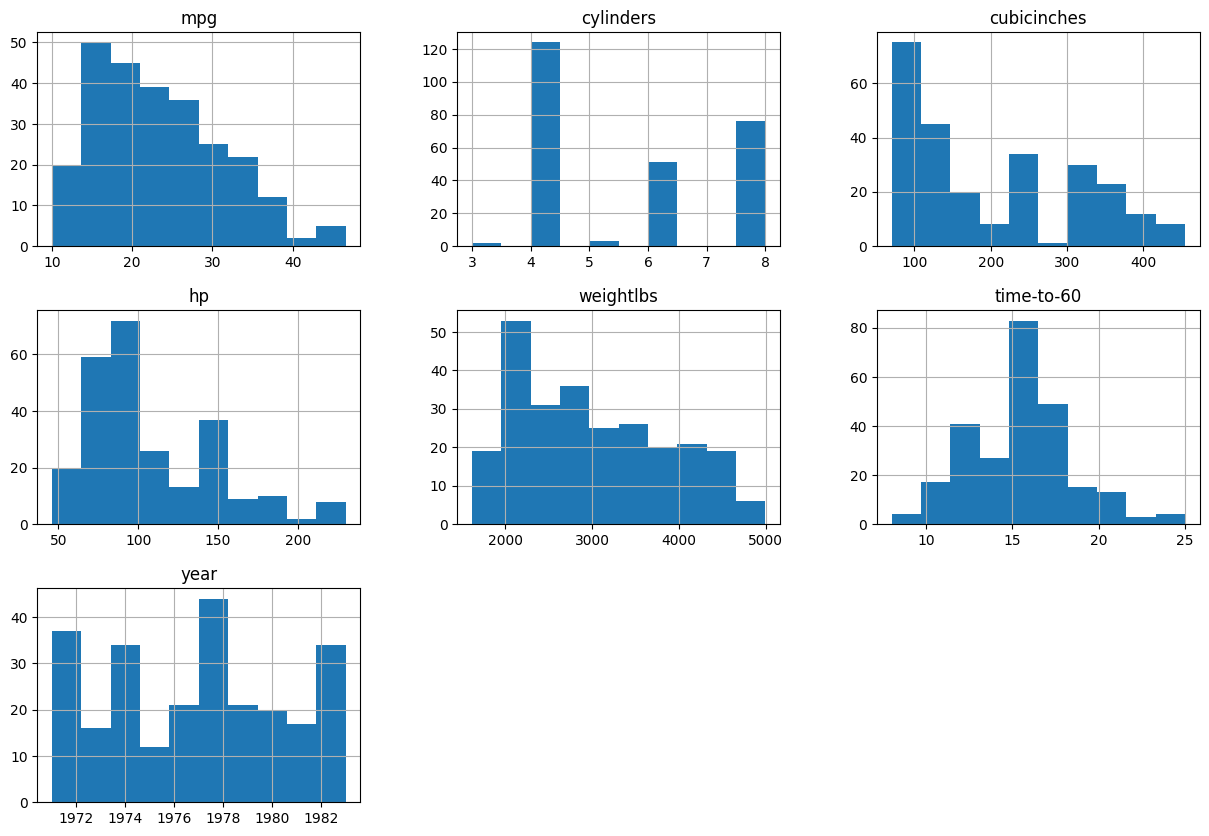

In [ ]:
#Histograma dos atriibutos
df_carros.hist(figsize = (15,10))
plt.show()

#Serve para identificar a distribuição de cada atributo do dataset

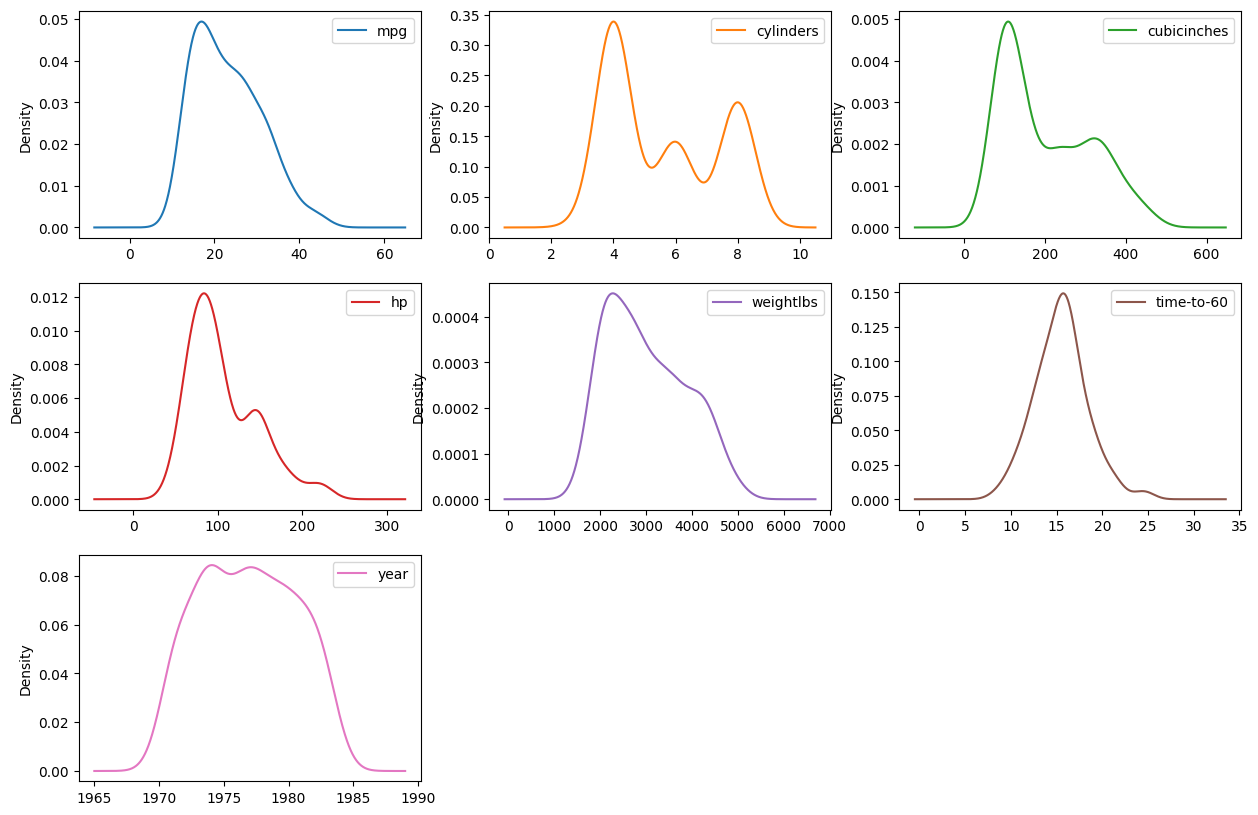

In [ ]:
# Distribuição dos atriibutos
df_carros.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

#Ajuda a identificar a distribuição de cada atributo do dataset
#com visualização em linhas

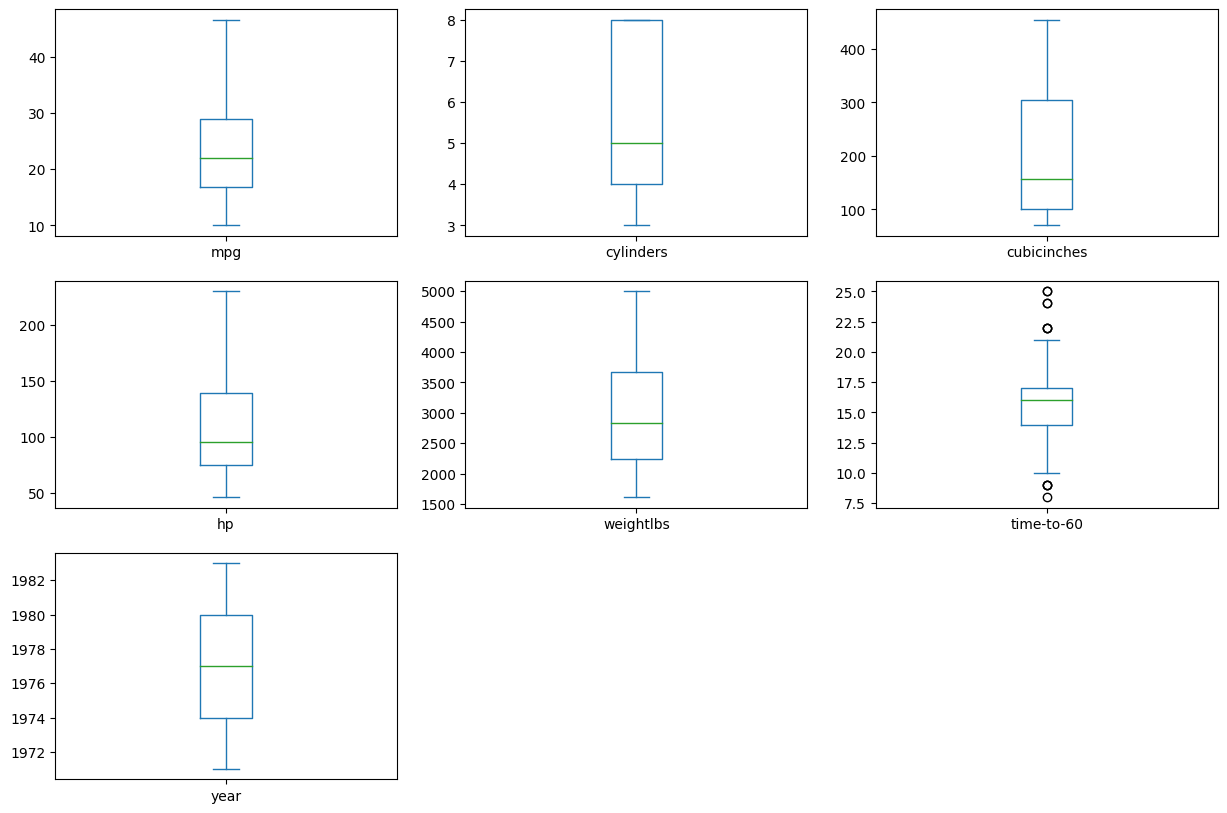

In [ ]:
# Boxplot
df_carros.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

#Apenas o "time-to-60" possui Outliers
#ferramenta gráfica utilizada para resumir e visualizar a distribuição de um conjunto de dados de maneira concisa.

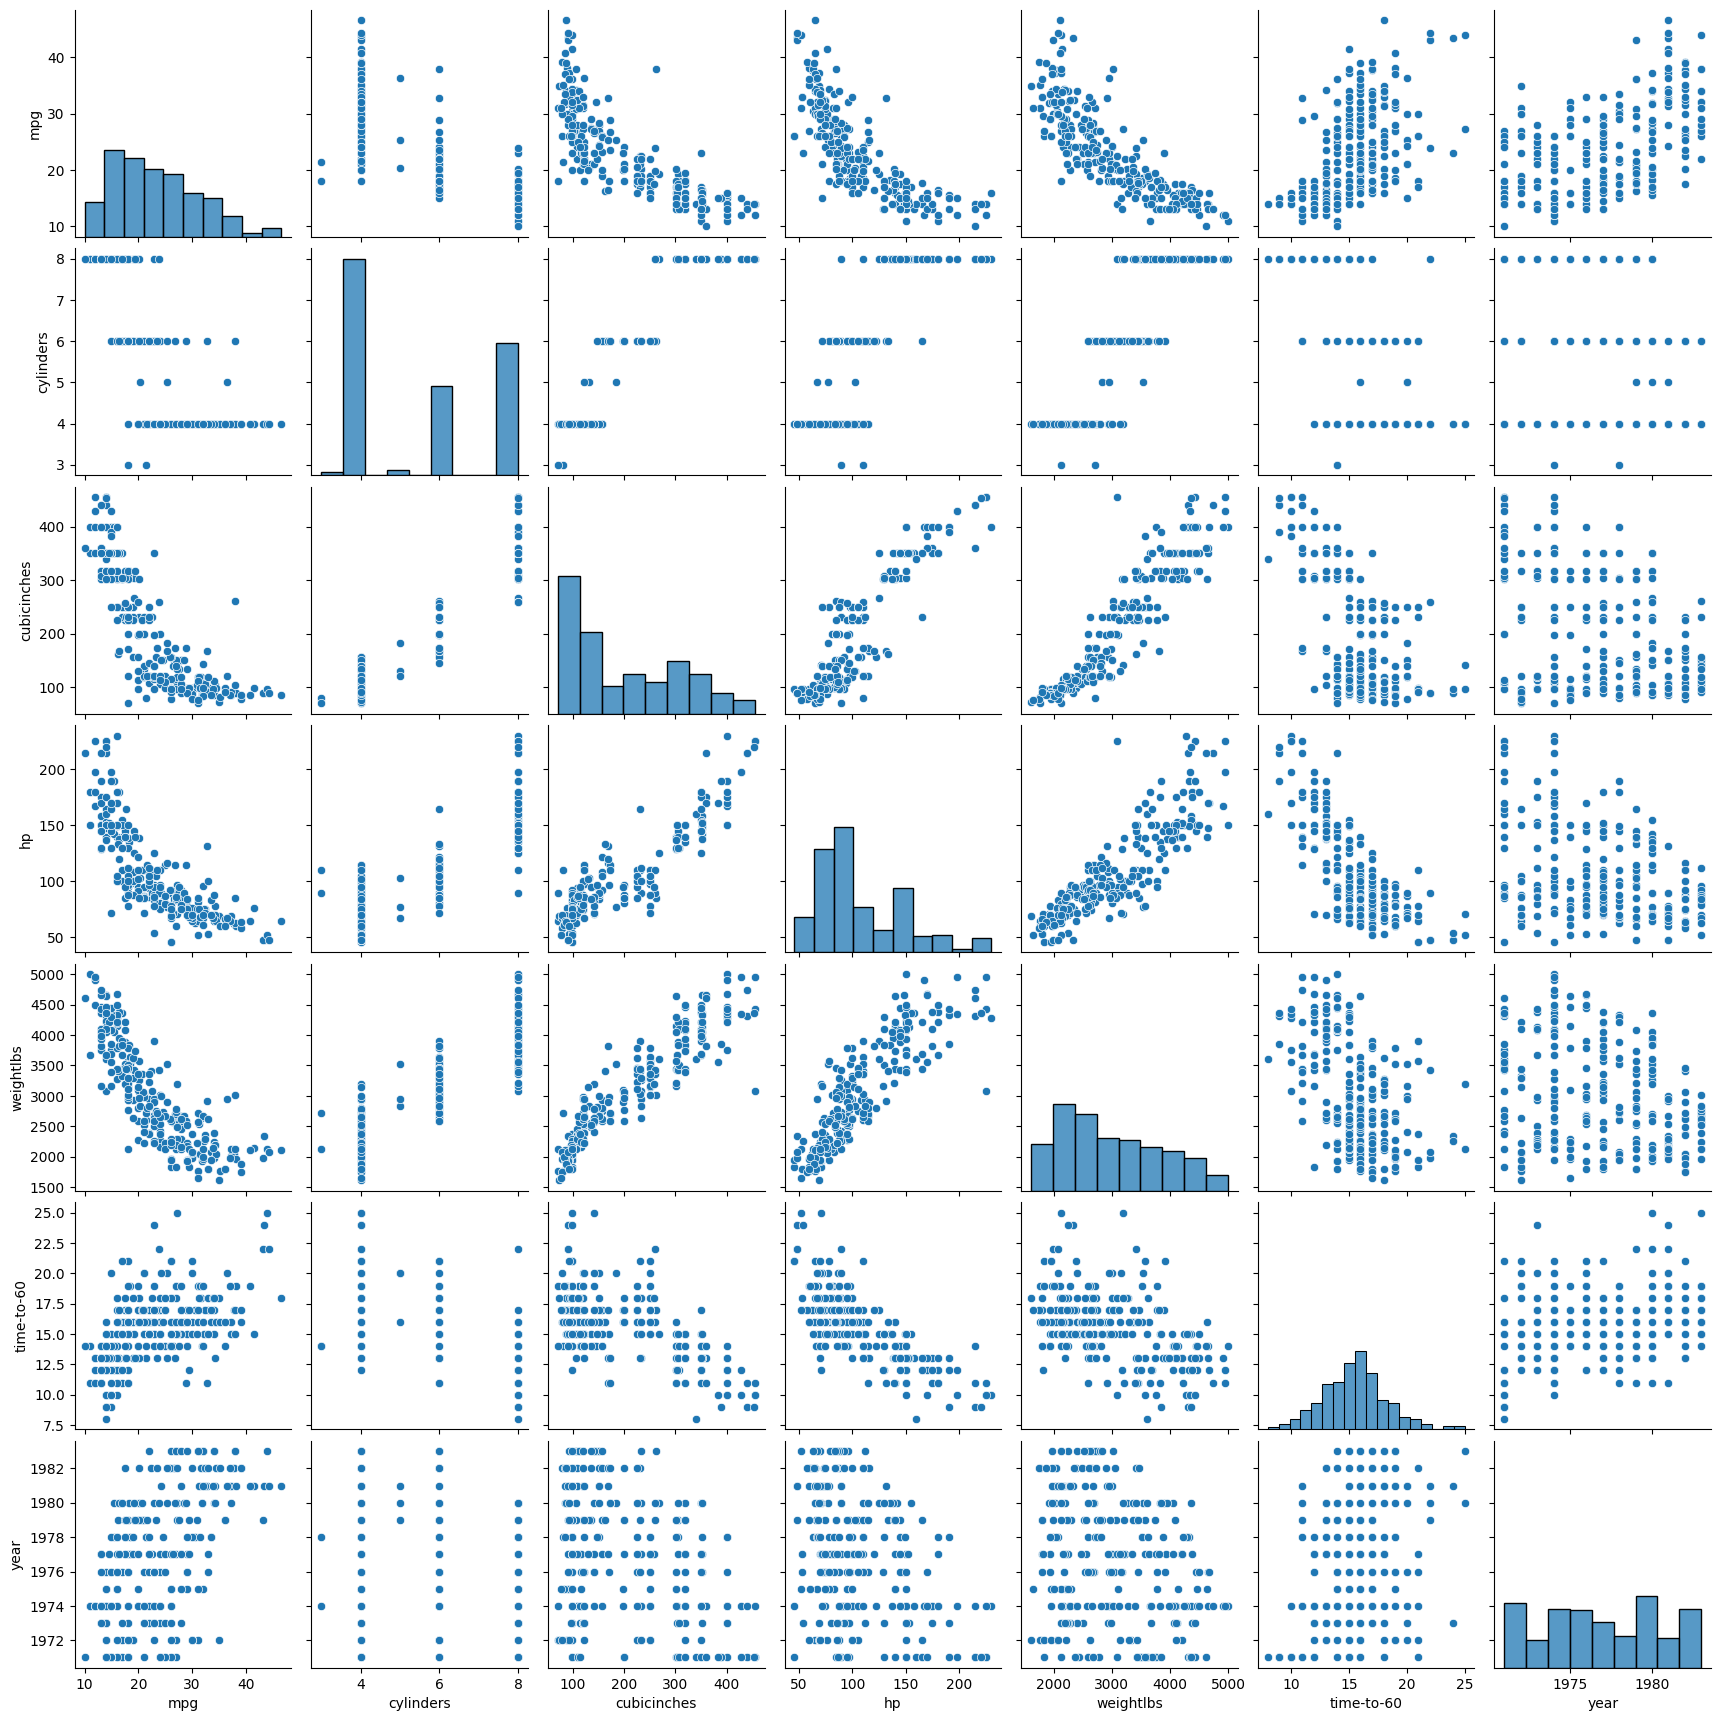

In [ ]:
# Scatter Plot com Seaborn - Por Atributos

sns.pairplot(df_carros)

#Relacionamento dos dados entre os atributos
#Quantidade de veiculos entre os anos de 1971 a 1989
#correlação negatica entre os atributos mpg e mpg, cylinders  cubicinches e hp
#É possível visualizar as relações entre o conjunto de atributos

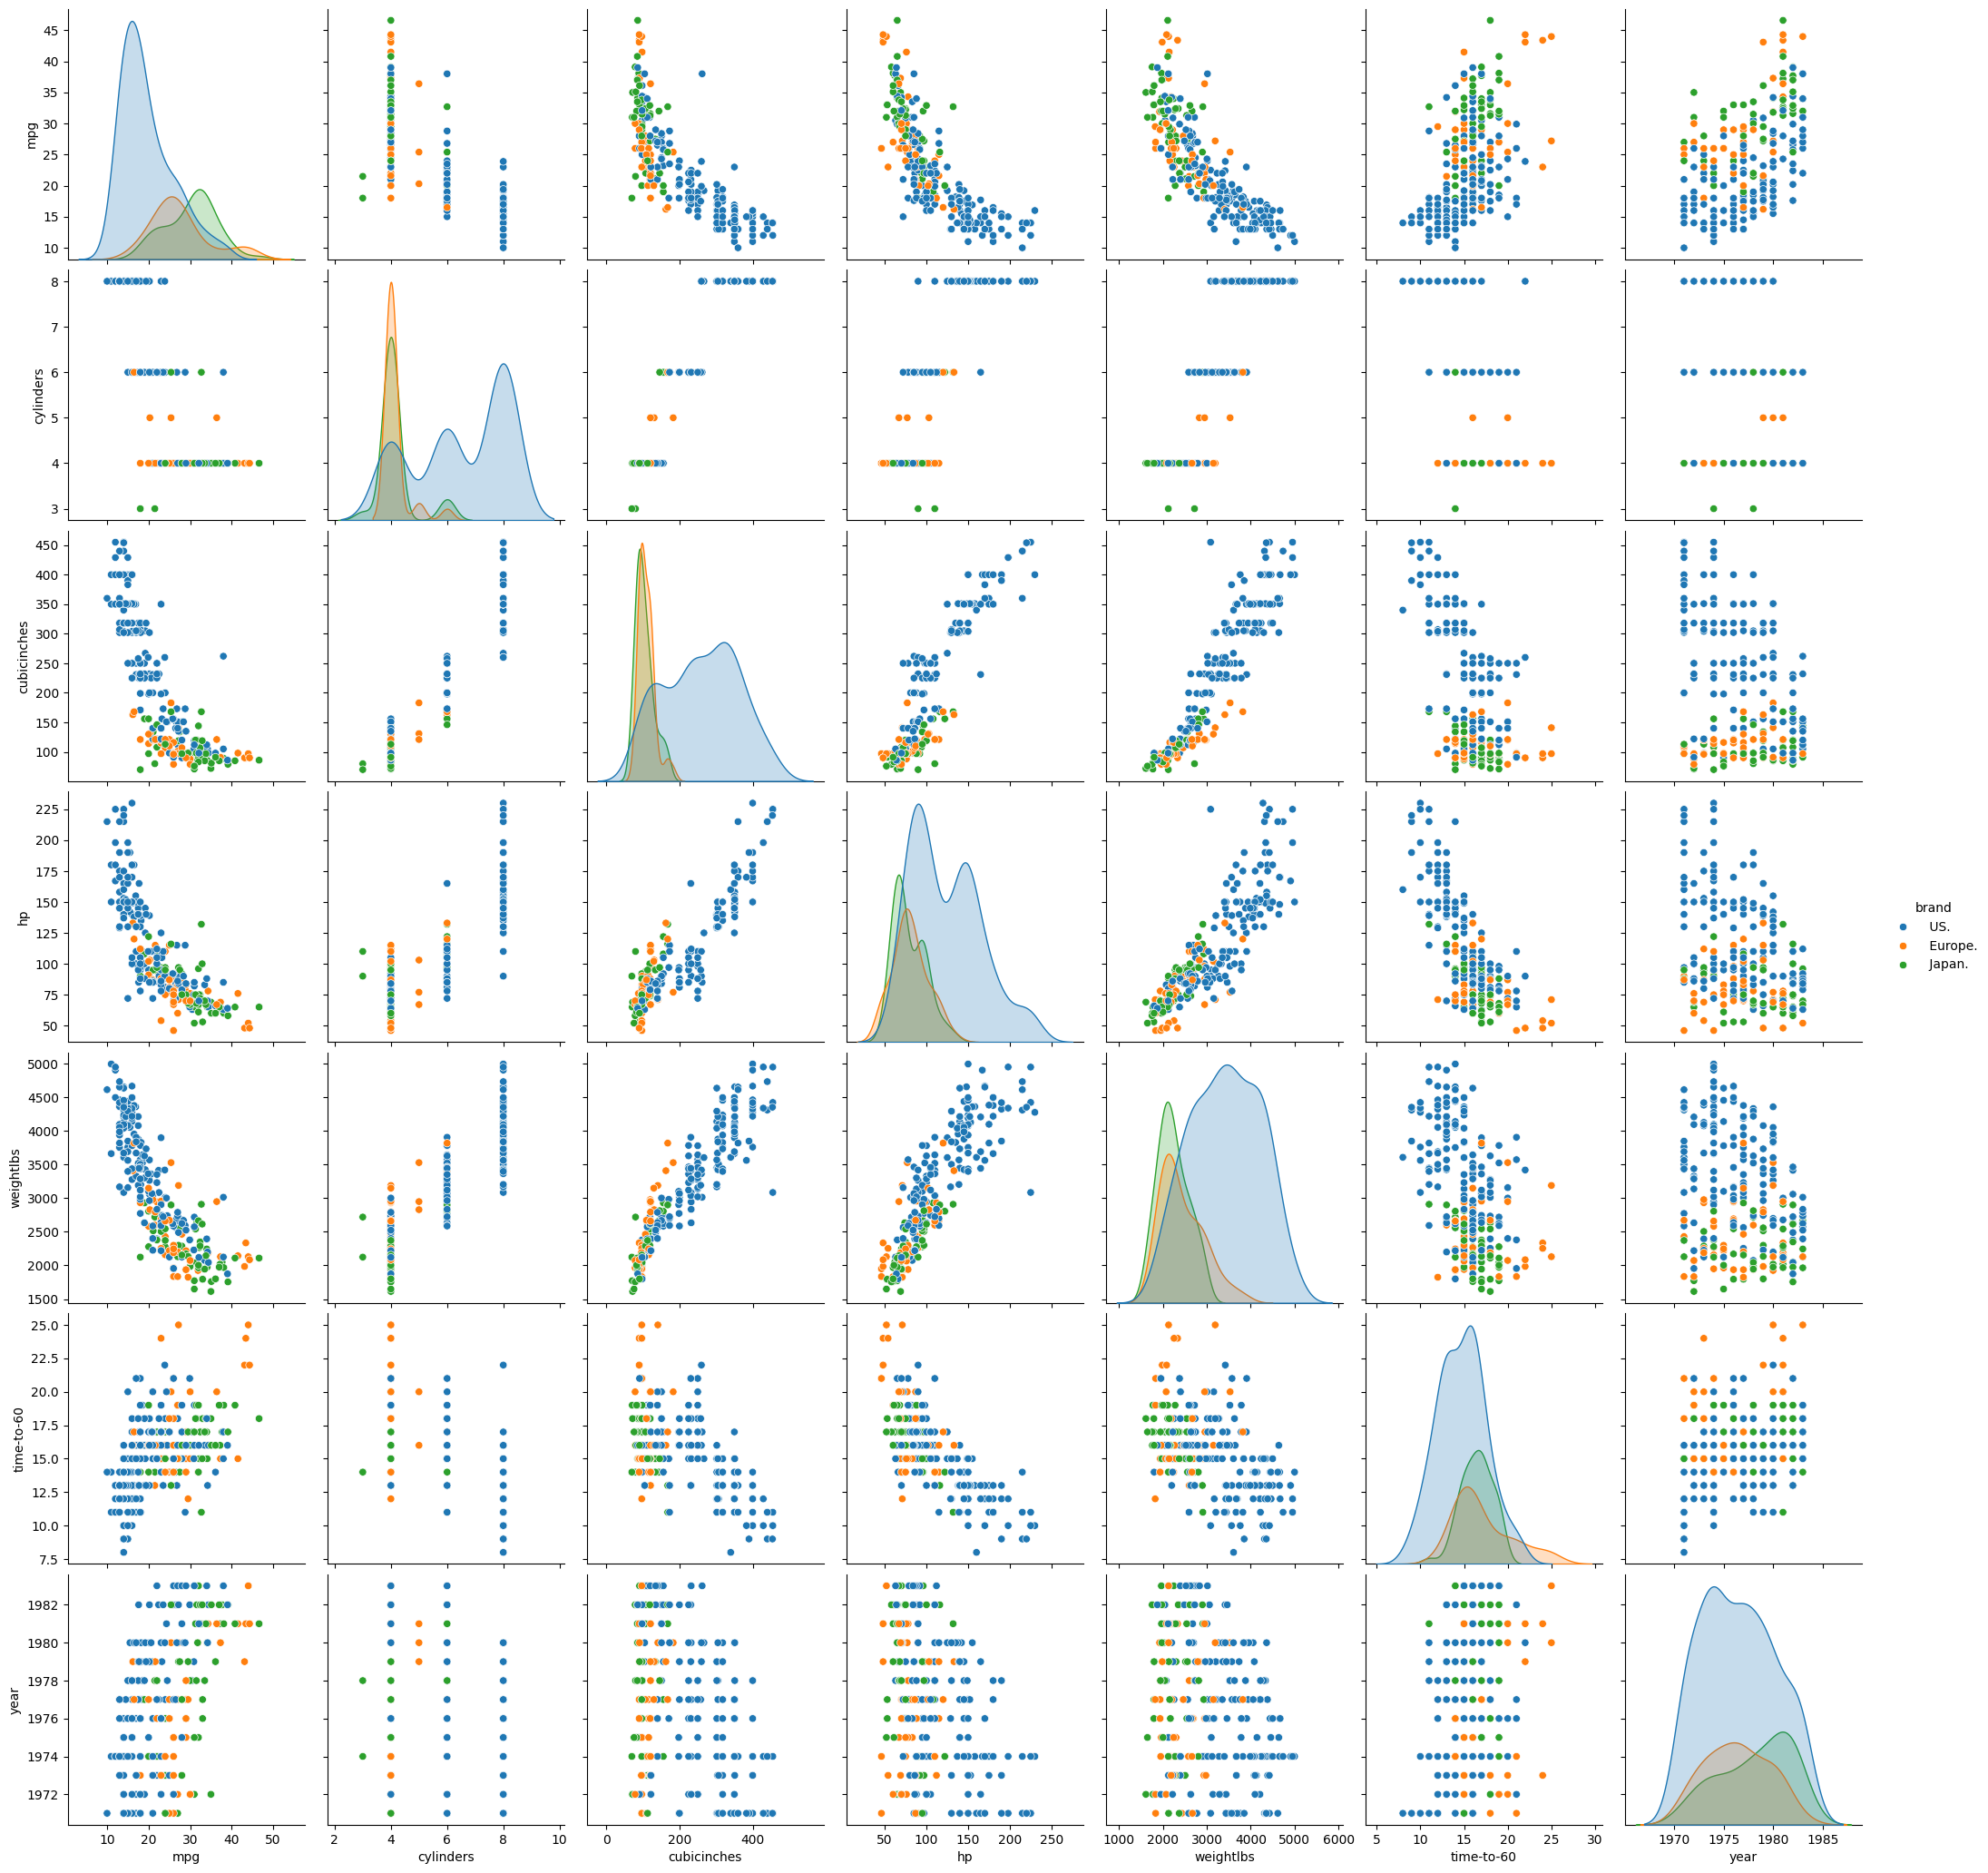

In [ ]:
# Scatter Plot com Seaborn - Por Atributos diferenciando pelo fabricante

sns.pairplot(df_carros, hue = "brand", height = 3);

#Além das relações entre os atribuitos vistos acima
#Com o Scatter Plot é possível segmentar os dados para cada país de fábricante
#Mais de 60% dos véiculos são Americanos

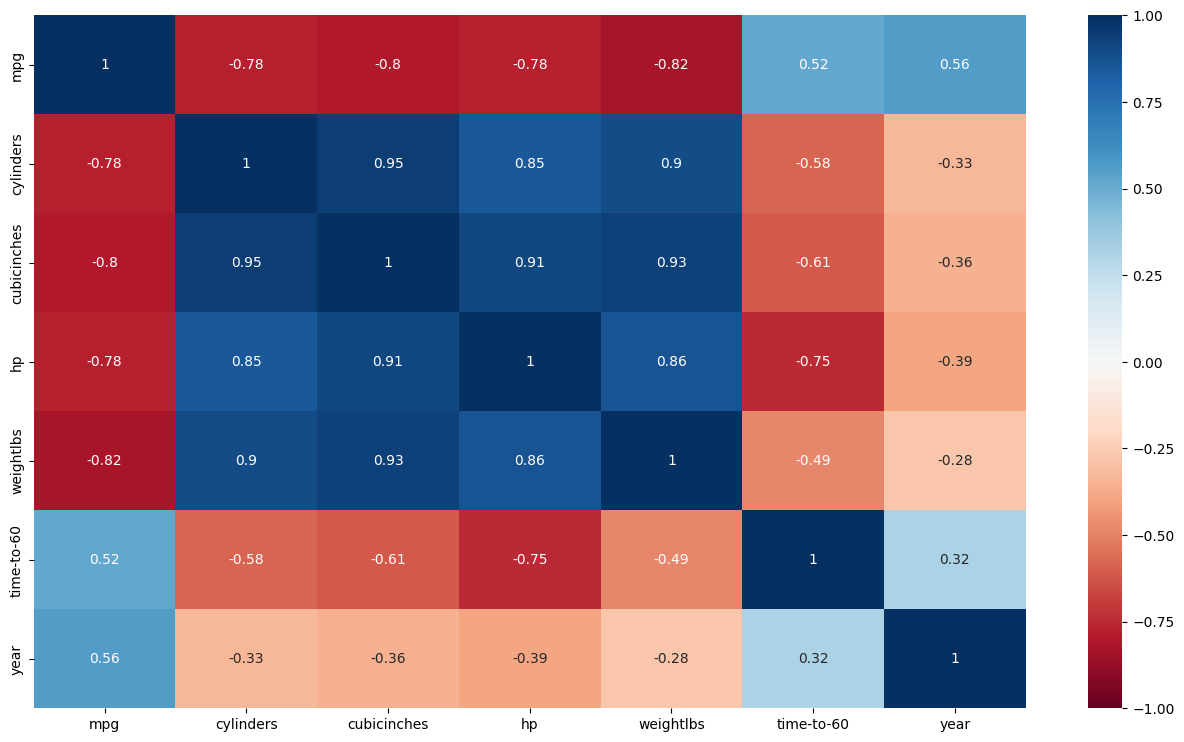

In [ ]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [16, 9]
matriz_correlacao=df_carros[['mpg','cylinders', 'cubicinches','hp', 'weightlbs','time-to-60', 'year']].corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='RdBu', vmin=-1, vmax=1)  #realiza o plot da matriz de correlação
plt.show()

#Amatriz de correlação torna mais claro os valores de correlção entre os atributos
#Confirmando algumas hipóteses e tornando outras mais evidentes
#Valores próximos de -1 são correlações negativas e próximos de +1 são correlações positivas
#Destaco a correlação positiva entre cylinders e cubicinches (0.95)
#e a correlação negativa mpg e weightlbs (-0,82)

# Pré-processamento de dados

In [ ]:
#pegando apenas os dados numéricos
df_carros_clusters = df_carros[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']]

In [ ]:
#Normalização com média 0 e desvio 1
normaliza = StandardScaler() #objeto para a normalização
X_std=normaliza.fit_transform(df_carros_clusters) #aplica a normalização

#O código usa StandardScaler do scikit-learn para normalizar os dados do DataFrame df_carros_clusters,
#ajustando cada atributo para ter média 0 e desvio padrão 1. A linha normaliza.fit_transform(df_carros_clusters) faz a transformação e
#armazena os dados normalizados em X_std. Isso é útil antes de rodar algoritmos de aprendizado de máquina, como clusterização.

In [ ]:
#Normalização armazenados  em X_std
X_std

array([[-1.16955986,  1.38259161,  1.35928352, ...,  1.40830944,
        -1.20581953, -1.33062399],
       [ 1.10918971, -0.91201748, -1.02737459, ..., -1.26647849,
        -0.51600992,  0.87416398],
       [-0.78764653,  1.38259161,  0.92035789, ...,  0.51827493,
        -1.55072433, -1.60622249],
       ...,
       [-0.1511243 ,  0.23528707,  0.28025802, ..., -0.20077927,
        -0.17110512,  1.70095947],
       [-0.66034208,  0.23528707,  0.28025802, ...,  0.32972814,
         0.17379969, -1.33062399],
       [-0.1511243 ,  0.23528707,  0.44485513, ...,  0.40584952,
        -0.17110512,  0.04736849]])

In [ ]:
#inicalizando o objeto PCA
pca = PCA(n_components=7)  #instancia o objeto
principalComponents = pca.fit_transform(X_std) #aplica a identificação do pca

#O código cria um objeto PCA para reduzir a dimensionalidade dos dados preservando a variabilidade dos dados.
#A linha principalComponents = pca.fit_transform(X_std) aplica o PCA nos dados normalizados X_std e armazena
#os resultados em principalComponents, que captura as variações mais importantes do conjunto original.

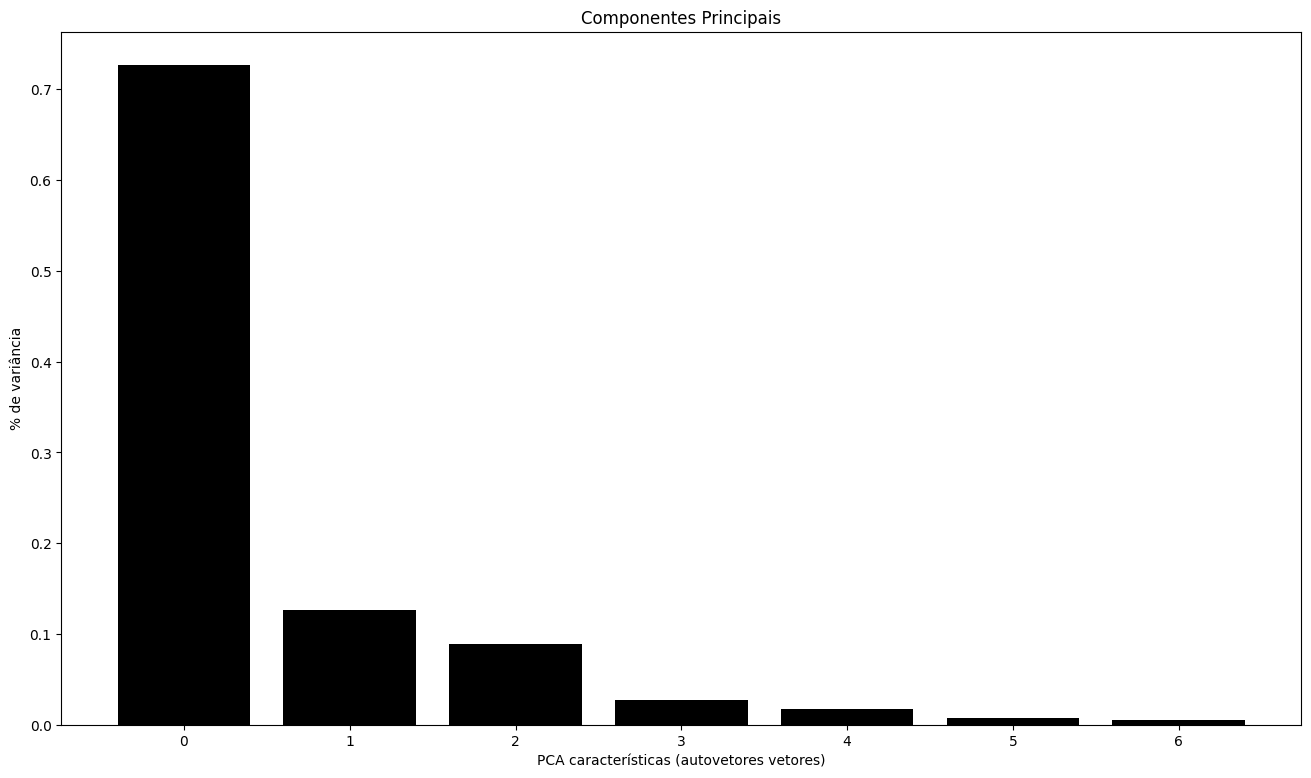

In [ ]:
#plot das componentes principais
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black');
plt.xlabel('PCA características (autovetores vetores)')
plt.ylabel('% de variância')
plt.title("Componentes Principais")
plt.xticks(features);

#O código gera um gráfico de barras que mostra a proporção de variância explicada por cada componente principal obtido
#a partir do PCA. A variável features representa os componentes principais, enquanto pca.explained_variance_ratio_
#fornece a porcentagem de variância que cada componente captura.

Text(0.5, 1.0, 'Componentes Principais - Acumulada')

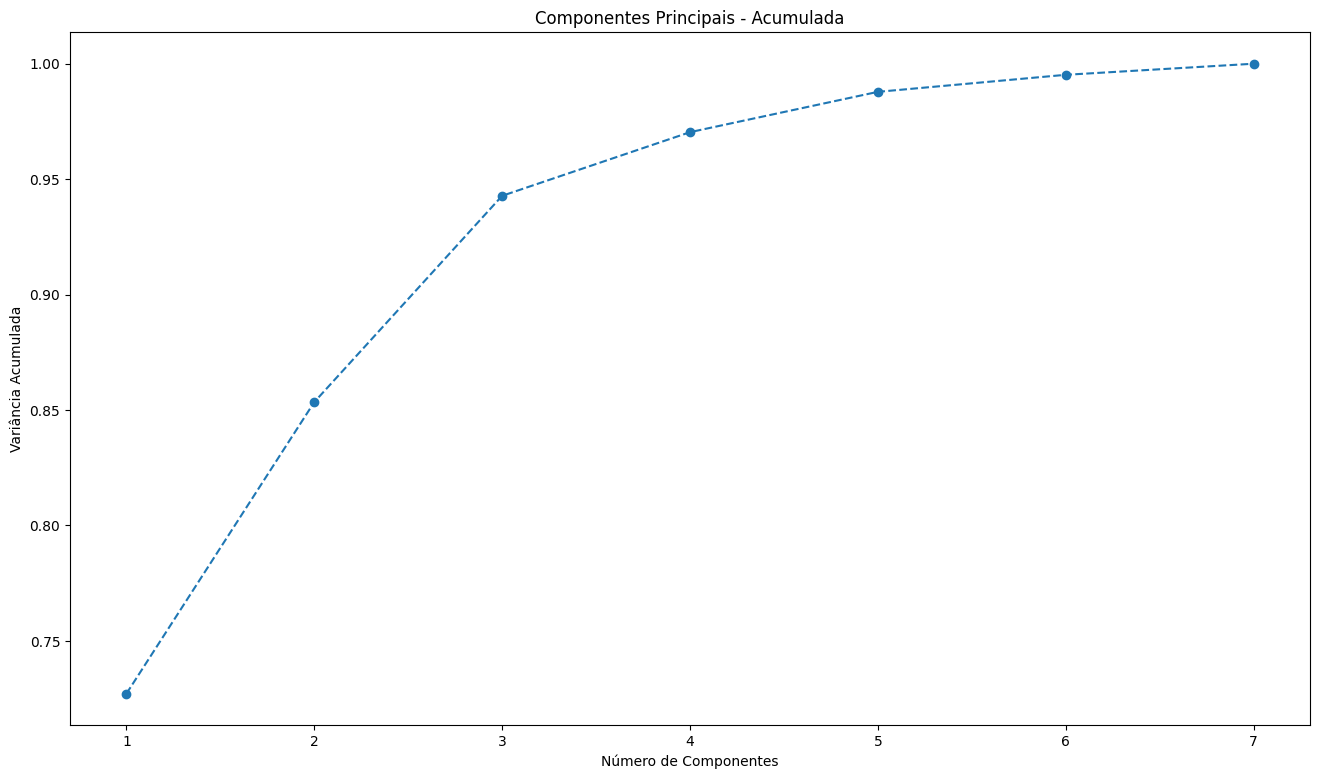

In [ ]:
#plot cumulativo das variâncias explicadas
pca.explained_variance_ratio_

plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--') #plot dos valores acumulados para os dados
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title("Componentes Principais - Acumulada")

#O código cria um gráfico que mostra a variância acumulada explicada pelos componentes principais do PCA.
#A função pca.explained_variance_ratio_ retorna a proporção de variância de cada componente, e a linha pca.explained_variance_ratio_.cumsum() calcula a variância acumulada.

In [ ]:
#criando o dataset com as componentes
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
#Visualização do dataset dos componentes
PCA_components.head(10)

0         1         2         3         4         5         6
0  3.462364 -0.521006 -0.126173  0.256198  0.081114  0.179353 -0.096898
1 -2.169734  0.289448 -1.283082 -0.086480 -0.287733  0.030423  0.015327
2  2.670404 -1.037925 -0.721314  0.510539 -0.529940  0.062964 -0.163207
3  3.514979 -0.837653 -0.787981  0.517371 -0.429775  0.186952  0.467418
4 -2.293086 -0.199693 -0.199599  0.081984 -0.175801 -0.005917  0.069508
5  1.423201  1.578994  0.991427  0.714038 -0.197613 -0.084843  0.176480
6  3.288916 -0.008542  0.255324  0.018004  0.012136  0.203194 -0.065238
7  4.766886 -0.517902 -1.101200  0.488425  0.741767 -0.081763  0.281947
8 -1.061240  0.868275  1.477076 -0.108841  0.194492  0.446807  0.050987
9 -2.941313  0.972843 -0.521614  0.442657 -0.032815  0.079485 -0.009475

In [ ]:
#Tamanho do Dataframe
PCA_components.shape

(256, 7)

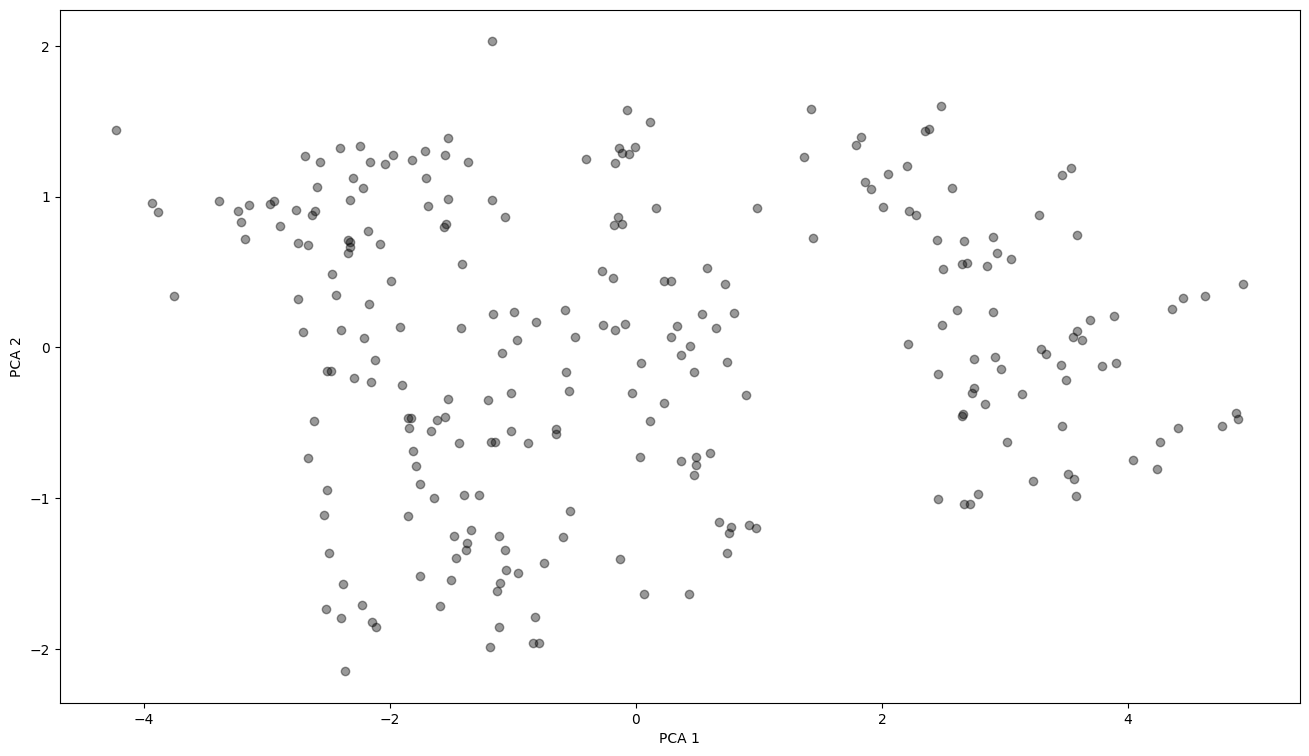

In [ ]:
#realizando o plot em duas dimensões (componentes 1 e 2 )
plt.scatter(PCA_components[0], PCA_components[1], alpha=.4, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

#O código gera um gráfico de dispersão que plota os dados reduzidos para duas dimensões, usando os dois primeiros componentes principais do PCA.

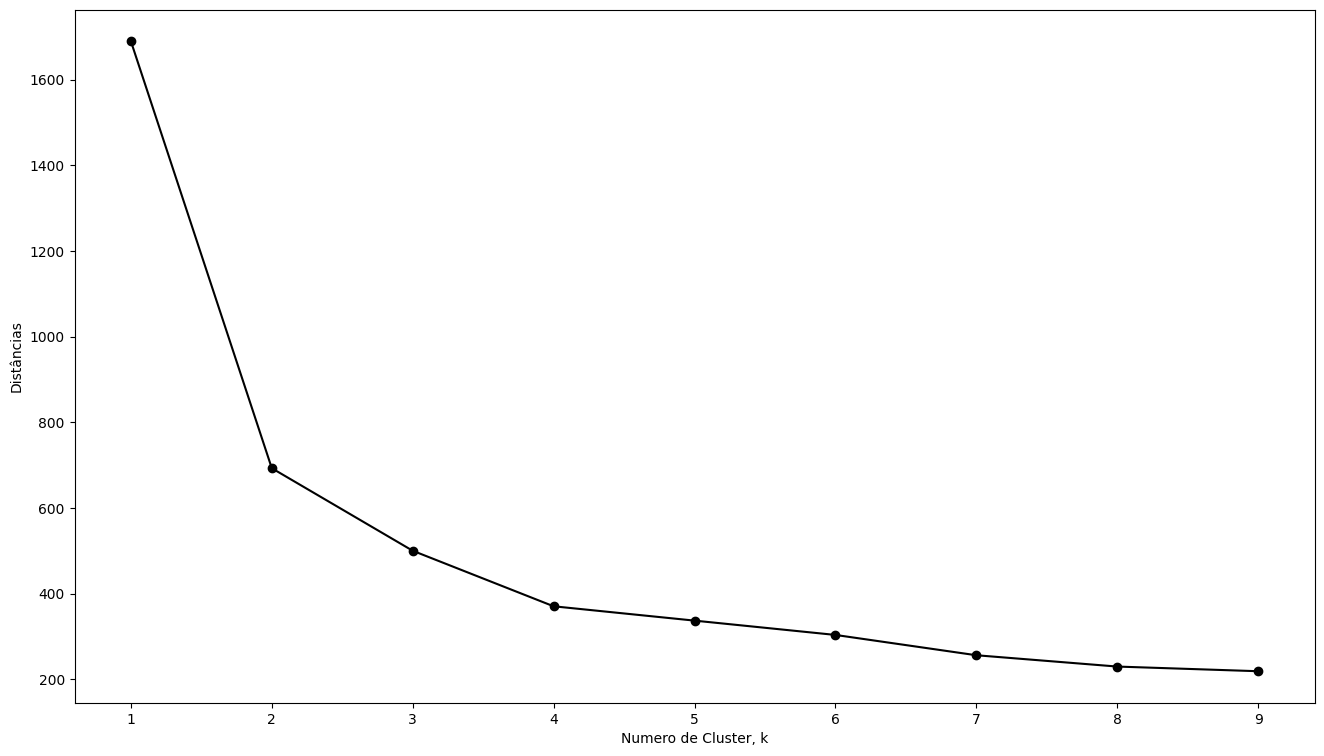

In [ ]:
#aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)

    # Aplica nas componentes selecionadas (3 componentes)
    model.fit(PCA_components.iloc[:,:3])

    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

#A quantidade de clusters definidas para esse projeto será de 3
#Pois a variação dos pontos 4 a 9 já não são muito significantes
#Além disso, pelo tamanho dos dados e atributos foi definido 3  clusters como ideal para o problema

In [ ]:
#---------------------------------------------------------------------------
# implementando o K-means com 3 clusters
#---------------------------------------------------------------------------
k_means_pca=KMeans(n_clusters=3)
k_means_pca.fit(PCA_components.iloc[:,:3])


#df com os dados iniciais e de cada uma das componentes
df_segment_pca_kmeans=pd.concat([df_carros.reset_index(drop=True),PCA_components.iloc[:,:3]],axis=1)
df_segment_pca_kmeans.columns.values[-3:]=['Componente 1','Componente 2','Componente 3']
df_segment_pca_kmeans['Seguimento no Kmeans']=k_means_pca.labels_


df_segment_pca_kmeans.head(10)

mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year     brand  \
0  14.0          8        350.0  165     4209.0          12  1972       US.   
1  31.9          4         89.0   71     1925.0          14  1980   Europe.   
2  17.0          8        302.0  140     3449.0          11  1971       US.   
3  15.0          8        400.0  150     3761.0          10  1971       US.   
4  30.5          4         98.0   63     2051.0          17  1978       US.   
5  23.0          8        350.0  125     3900.0          17  1980       US.   
6  13.0          8        351.0  158     4363.0          13  1974       US.   
7  14.0          8        440.0  215     4312.0           9  1971       US.   
8  25.4          5        183.0   77     3530.0          20  1980   Europe.   
9  37.7          4         89.0   62     2050.0          17  1982    Japan.   

   Componente 1  Componente 2  Componente 3  Seguimento no Kmeans  
0      3.462364     -0.521006     -0.126173                     1  
1     -2.169734      0.289448     -1.283082                     2  
2      2.670404     -1.037925     -0.721314                     1  
3      3.514979     -0.837653     -0.787981                     1  
4     -2.293086     -0.199693     -0.199599                     2  
5      1.423201      1.578994      0.991427                     1  
6      3.288916     -0.008542      0.255324                     1  
7      4.766886     -0.517902     -1.101200                     1  
8     -1.061240      0.868275      1.477076                     0  
9     -2.941313      0.972843     -0.521614                     2

In [ ]:
#adicionando um dicionário para cada um dos seguimentos
df_segment_pca_kmeans['Cluster']=df_segment_pca_kmeans['Seguimento no Kmeans'].map({0:'C1',
                     1:'C2',
                     2:'C3'})


In [ ]:
#Visualização do dataframe com o dicionário dos Clusters
df_segment_pca_kmeans.head()

mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year     brand  \
0  14.0          8        350.0  165     4209.0          12  1972       US.   
1  31.9          4         89.0   71     1925.0          14  1980   Europe.   
2  17.0          8        302.0  140     3449.0          11  1971       US.   
3  15.0          8        400.0  150     3761.0          10  1971       US.   
4  30.5          4         98.0   63     2051.0          17  1978       US.   

   Componente 1  Componente 2  Componente 3  Seguimento no Kmeans Cluster  
0      3.462364     -0.521006     -0.126173                     1      C2  
1     -2.169734      0.289448     -1.283082                     2      C3  
2      2.670404     -1.037925     -0.721314                     1      C2  
3      3.514979     -0.837653     -0.787981                     1      C2  
4     -2.293086     -0.199693     -0.199599                     2      C3

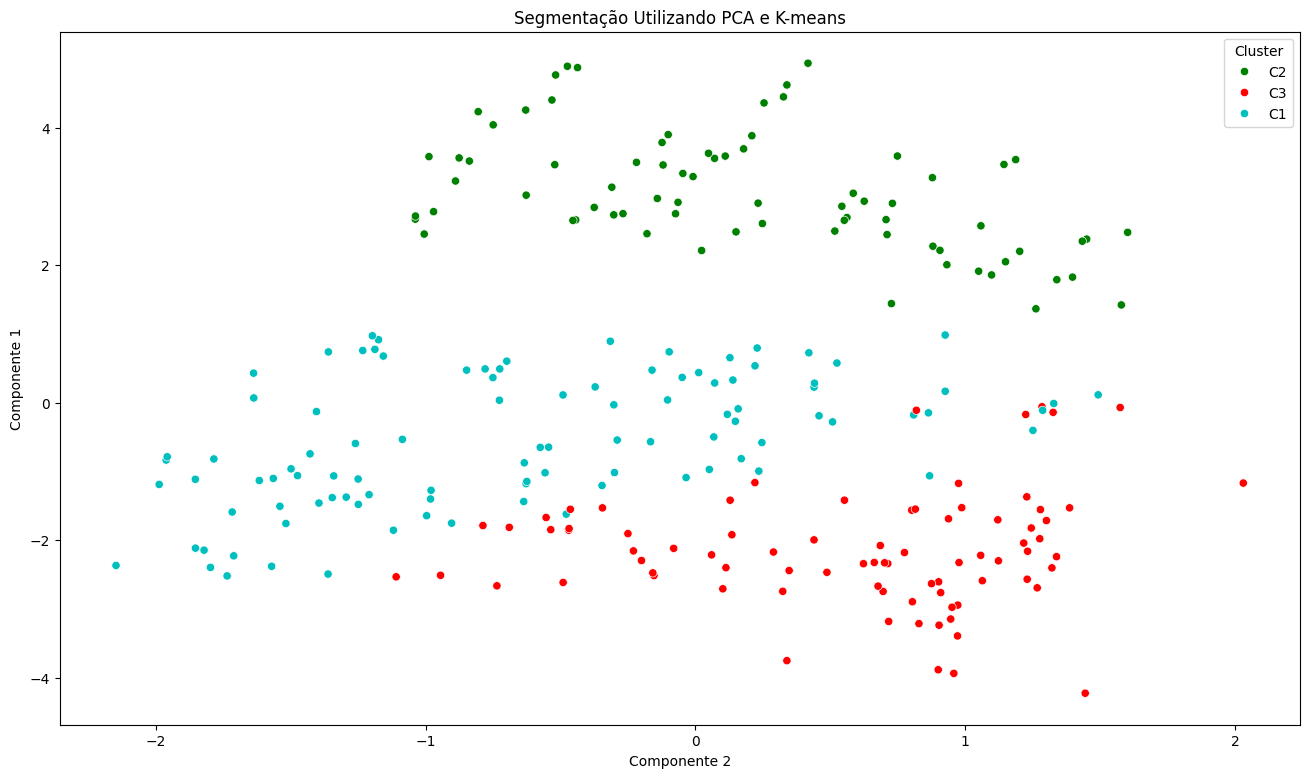

In [ ]:
#plotando os resultados
x_axis = df_segment_pca_kmeans['Componente 2']
y_axis = df_segment_pca_kmeans['Componente 1']

# Corrigindo a chamada para sns.scatterplot
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segment_pca_kmeans['Cluster'], palette=['g', 'r', 'c'])

plt.title('Segmentação Utilizando PCA e K-means')
plt.show()

#O título do gráfico é definido como 'Segmentação Utilizando PCA e K-means', e plt.show() exibe o gráfico resultante.
#Isso permite visualizar como os dados estão agrupados em relação às suas características principais.

#Conclusão

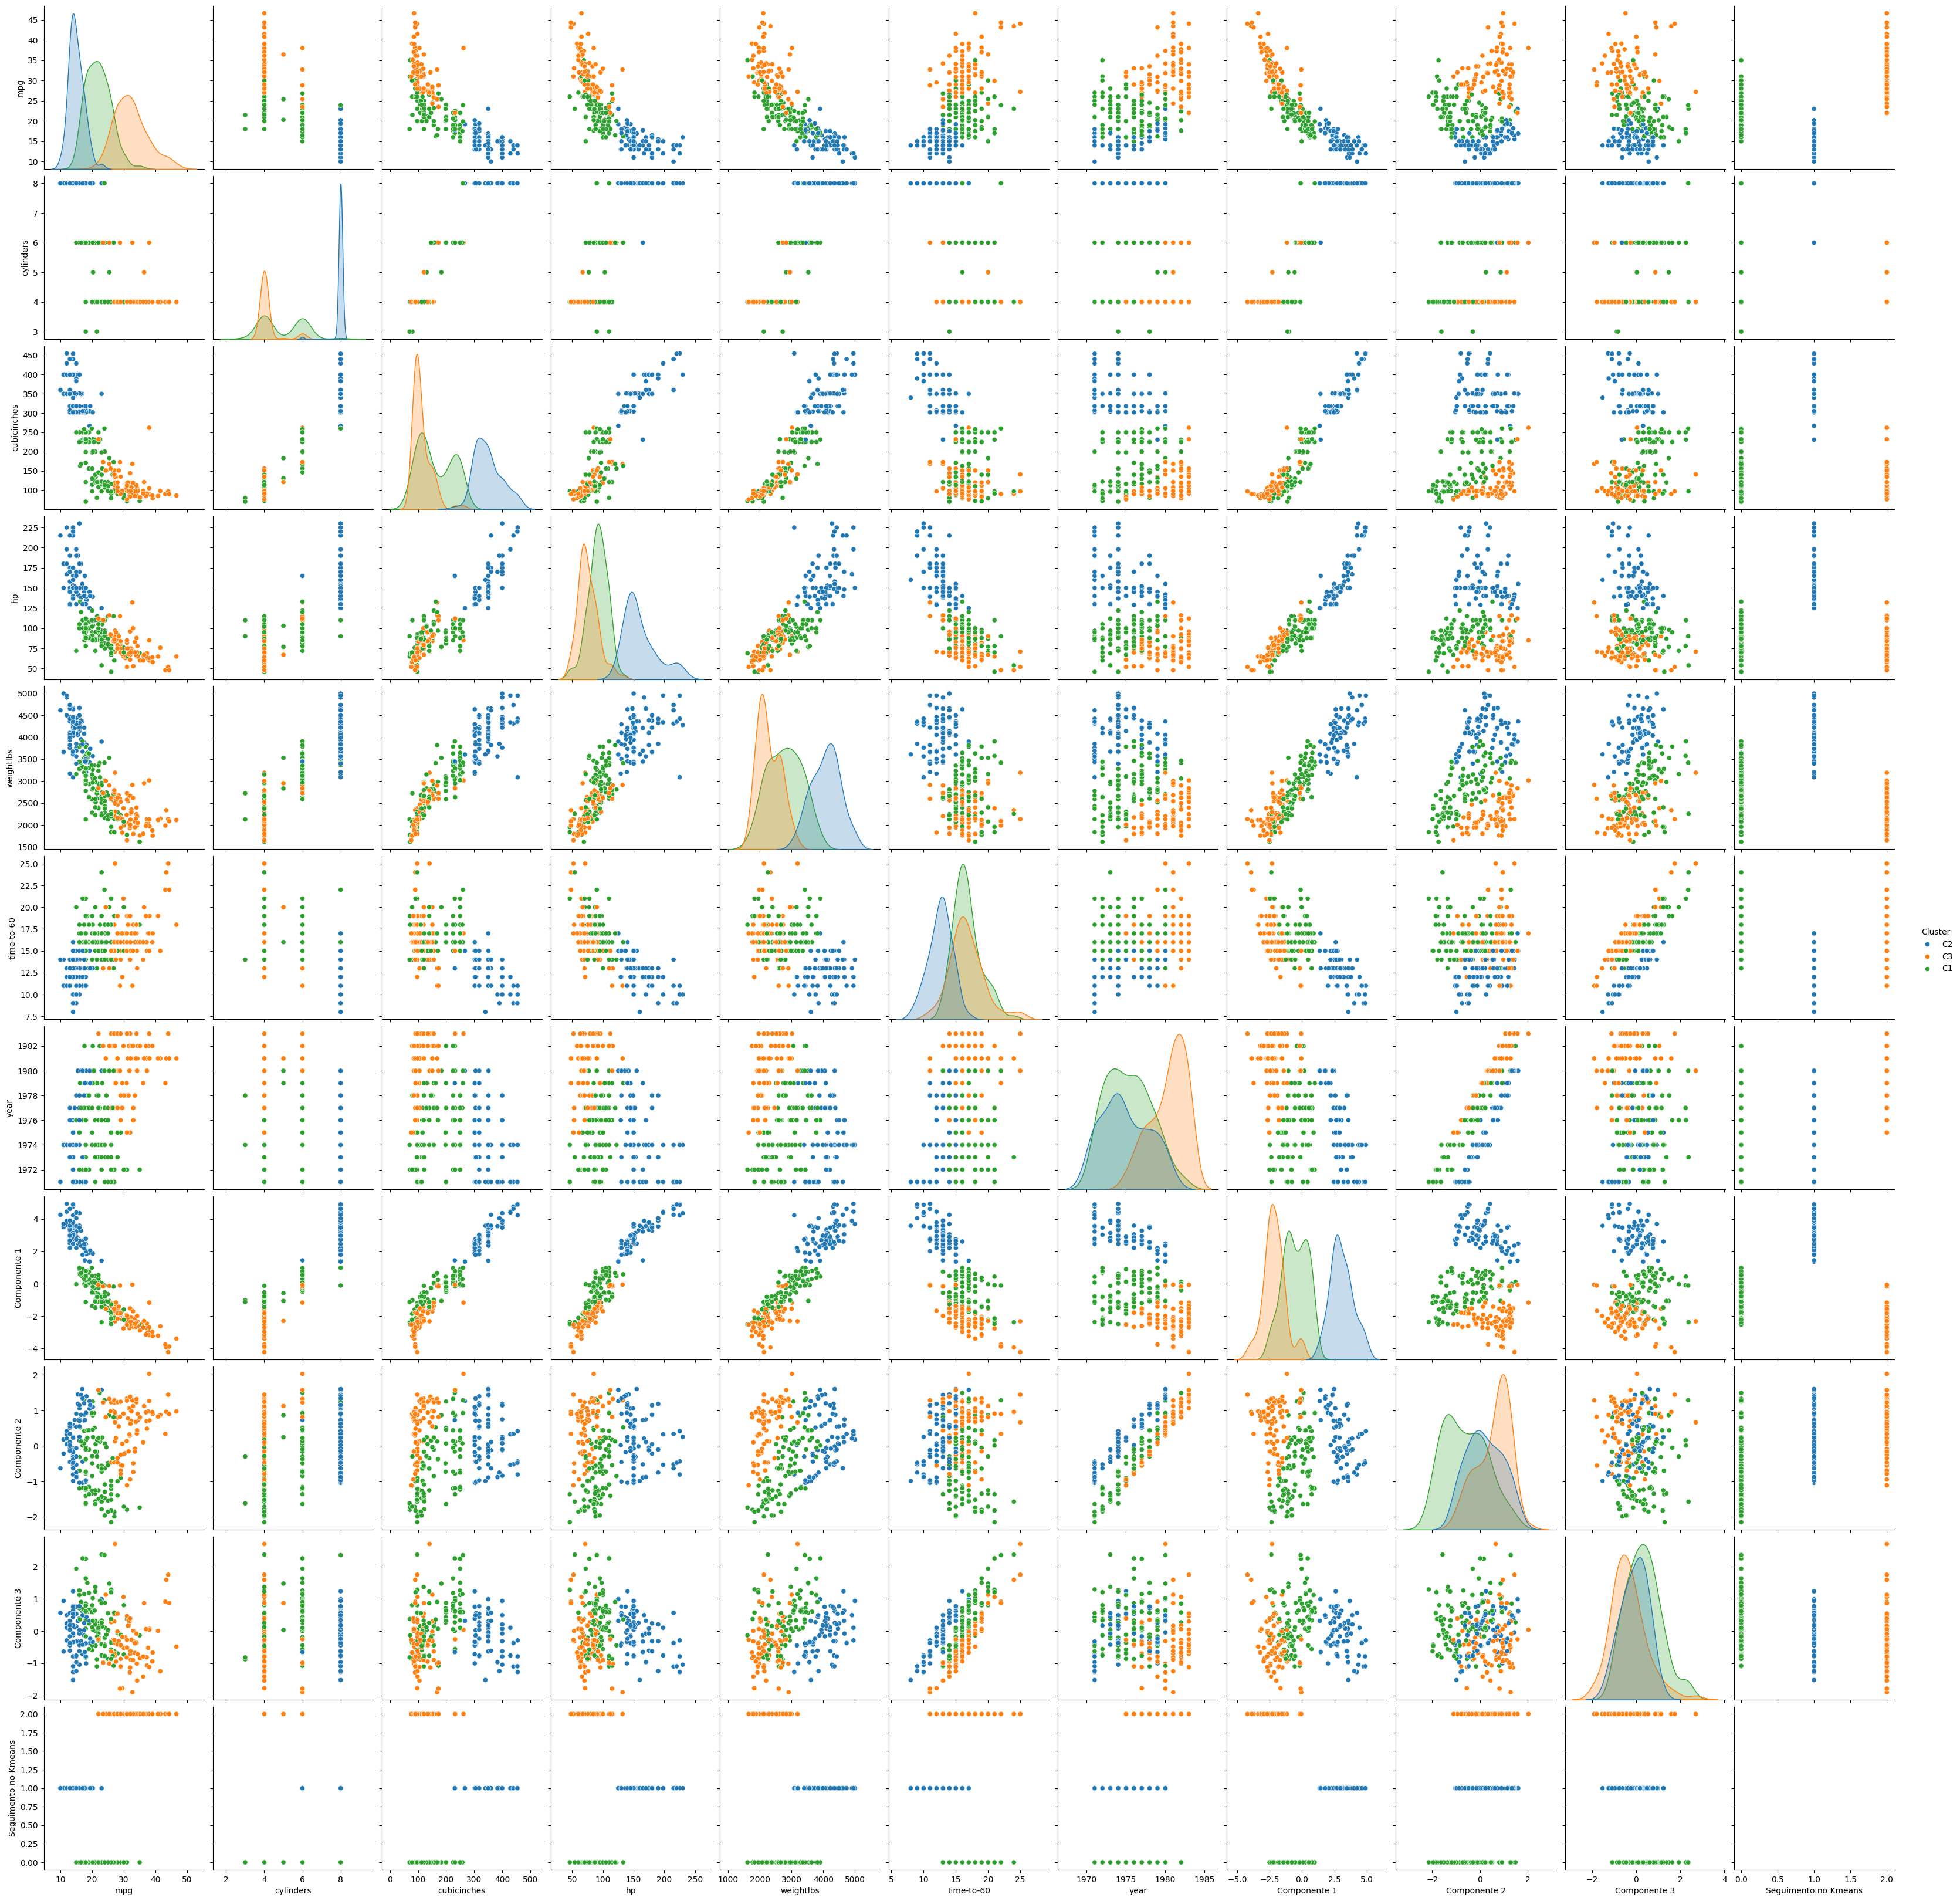

In [ ]:
# Scatter Plot com Seaborn - Por Cluster

sns.pairplot(df_segment_pca_kmeans, hue = "Cluster", height = 3);

Neste projeto foi realizado um processo de análise de dados, pré-processamento de dados e processos de normalização, redução de dimensionalidade e segmentação de dados utilizando PCA (Análise de Componentes Principais) e K-means.

Após a segmentação dos clusters pelo K-means, as visualizações demonstram claramente as semelhanças entre os atributos de cada cluster, evidenciando as características compartilhadas dos dados agrupados.

Dessa forma, essa metodologia pode ser aplicada a outros problemas semelhantes em que se busca definir clusters, proporcionando uma abordagem eficaz para análise e interpretação de conjuntos de dados complexos.